# Import

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch.nn.functional as F

# Data Exploration and Processing

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/income.csv')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.select_dtypes(include=np.number).corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
columns_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for col in columns_to_encode:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

data["income"] = (data["income"] == '>50K').astype(int)

In [ ]:
X = data.select_dtypes(include=np.number).drop('income', axis=1)
y = data['income']

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# PyTorch

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [ ]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
#Permodelan PyTorch
class PytorchModel(nn.Module):
    def __init__(self):
        super(PytorchModel, self).__init__()
        self.layer1 = nn.Linear(14, 256)  # Increased neurons in the first layer
        self.layer2 = nn.Linear(256, 128) # Increased neurons in the second layer
        self.layer3 = nn.Linear(128, 64)  # Added a third hidden layer
        self.out = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)     # Added dropout for regularization

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.dropout(x)  # Apply dropout after the first layer
        x = F.relu(self.layer2(x))
        x = self.dropout(x)  # Apply dropout after the second layer
        x = F.relu(self.layer3(x))  # Pass through the third layer
        x = self.dropout(x) # Apply dropout before output
        x = torch.sigmoid(self.out(x))
        return x

In [ ]:
# Inisialisasi model
model = PytorchModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.009)

In [ ]:
best_loss = float('inf')
patience = 15
counter = 0
epochs = 50

train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    tot_train_loss = 0

    for x, target in train_loader:
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        tot_train_loss += loss.item()

    avg_train_loss = tot_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)  # Menambahkan train loss


    model.eval()
    total_val_loss = 0

    with torch.no_grad():
        for x_val, target_val in test_loader:  # validation loader
            output_val = model(x)
            loss_val = criterion(output, target)
            total_val_loss += loss_val.item()

    avg_val_loss = total_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}: T.Loss = {avg_train_loss:.6f}, V.Loss = {avg_val_loss:.6f}")

Epoch 1: T.Loss = 0.431710, V.Loss = 0.242950
Epoch 2: T.Loss = 0.401923, V.Loss = 0.424589
Epoch 3: T.Loss = 0.394666, V.Loss = 0.412678
Epoch 4: T.Loss = 0.387935, V.Loss = 0.316239
Epoch 5: T.Loss = 0.381162, V.Loss = 0.471296
Epoch 6: T.Loss = 0.375860, V.Loss = 0.251191
Epoch 7: T.Loss = 0.370089, V.Loss = 0.396176
Epoch 8: T.Loss = 0.364341, V.Loss = 0.516568
Epoch 9: T.Loss = 0.363261, V.Loss = 0.563070
Epoch 10: T.Loss = 0.357112, V.Loss = 0.379539
Epoch 11: T.Loss = 0.357984, V.Loss = 0.347996
Epoch 12: T.Loss = 0.358693, V.Loss = 0.363600
Epoch 13: T.Loss = 0.350060, V.Loss = 0.449244
Epoch 14: T.Loss = 0.349804, V.Loss = 0.360135
Epoch 15: T.Loss = 0.356454, V.Loss = 0.287895
Epoch 16: T.Loss = 0.355937, V.Loss = 0.159202
Epoch 17: T.Loss = 0.355419, V.Loss = 0.203813
Epoch 18: T.Loss = 0.343551, V.Loss = 0.235331
Epoch 19: T.Loss = 0.349055, V.Loss = 0.630147
Epoch 20: T.Loss = 0.354296, V.Loss = 0.427264
Epoch 21: T.Loss = 0.347330, V.Loss = 0.475186
Epoch 22: T.Loss = 0.3

In [ ]:
model.eval()
total_loss = 0
y_preds = []
y_actuals = []

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

with torch.no_grad():
    for x, target in test_loader:
        output = model(x)
        y_preds.extend(output.numpy().flatten())
        y_actuals.extend(target.numpy().flatten())  #


y_preds = np.array(y_preds)
y_actuals = np.array(y_actuals)
y_actuals.flatten().shape
y_preds_label = (y_preds > 0.5).astype(int)

if len(y_preds) == 2 * len(y_actuals):
    y_preds = y_preds[: len(y_actuals)]

if len(y_preds.shape) == 1:
    y_preds_label = (y_preds >= 0.5).astype(int)
else:
    y_preds_label = np.argmax(y_preds, axis=1)

In [ ]:
accuracy_pytorch = accuracy_score(y_actuals, y_preds_label)
precision_pytorch = precision_score(y_actuals, y_preds_label)
recall_pytorch = recall_score(y_actuals, y_preds_label)
f1_pytorch = f1_score(y_actuals, y_preds_label)
auc_pytorch = roc_auc_score(y_actuals, y_preds.flatten())

In [ ]:
print(f"Accuracy (PyTorch): {accuracy_pytorch}")
print(f"Precision (PyTorch): {precision_pytorch}")
print(f"Recall (PyTorch): {recall_pytorch}")
print(f"F1 Score (PyTorch): {f1_pytorch}")
print(f"AUC (PyTorch): {auc_pytorch}")


Accuracy (PyTorch): 0.866997861904163
Precision (PyTorch): 0.8695046243506905
Recall (PyTorch): 0.8634876698540513
F1 Score (PyTorch): 0.8664857016602487
AUC (PyTorch): 0.9456920859360043


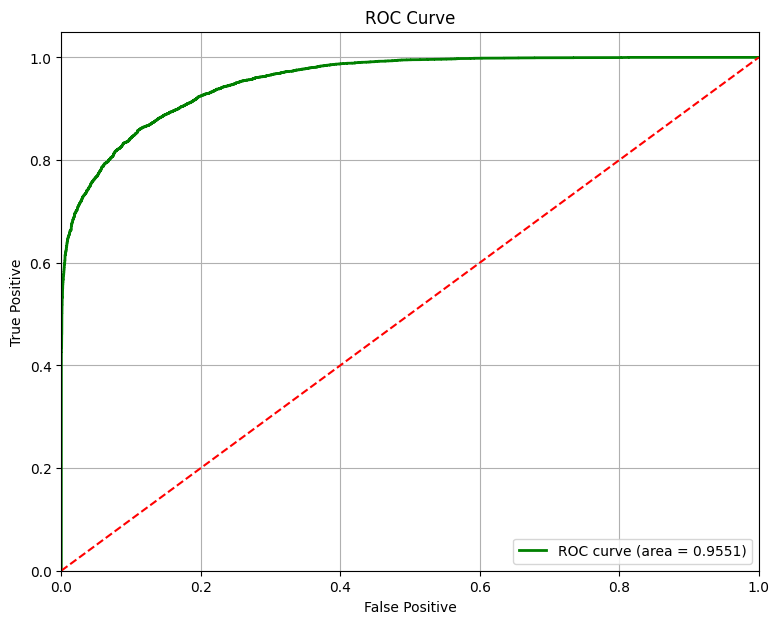

In [ ]:
# Hitung ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(9, 7))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Tensor Flow

In [ ]:
input = tf.keras.Input(shape=(14,))
x = tf.keras.layers.Dense(256, activation='relu')(input)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

tf_model = tf.keras.Model(input, output)
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

y_pred_probs = tf_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)


Epoch 1/50
1988/1988 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7956 - loss: 0.4298 - val_accuracy: 0.8278 - val_loss: 0.3641
Epoch 2/50
1988/1988 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8365 - loss: 0.3509 - val_accuracy: 0.8416 - val_loss: 0.3384
Epoch 3/50
1988/1988 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8463 - loss: 0.3269 - val_accuracy: 0.8569 - val_loss: 0.3079
Epoch 4/50
1988/1988 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8577 - loss: 0.2987 - val_accuracy: 0.8533 - val_loss: 0.2979
Epoch 5/50
1988/1988 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8650 - loss: 0.2843 - val_accuracy: 0.8621 - val_loss: 0.2907
Epoch 6/50
1988/1988 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8689 - loss: 0.2759 - val_accuracy: 0.8637 - val_loss: 0.2867
Epoch 7/50
1988/1988 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8730 - loss: 0.2709 - val_accuracy: 0.8666 - val_loss: 0.2785
Epoch 8/50
1988/1988 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8747 - loss: 0.264

In [ ]:
cm = confusion_matrix(y_test, y_pred)

tensorf_acc = accuracy_score(y_test, y_pred)
tensorf_prec = precision_score(y_test, y_pred)
tensorf_rec = recall_score(y_test, y_pred)
tensorf_f1 = f1_score(y_test, y_pred)
tensorf_auc = roc_auc_score(y_test, y_pred_probs)

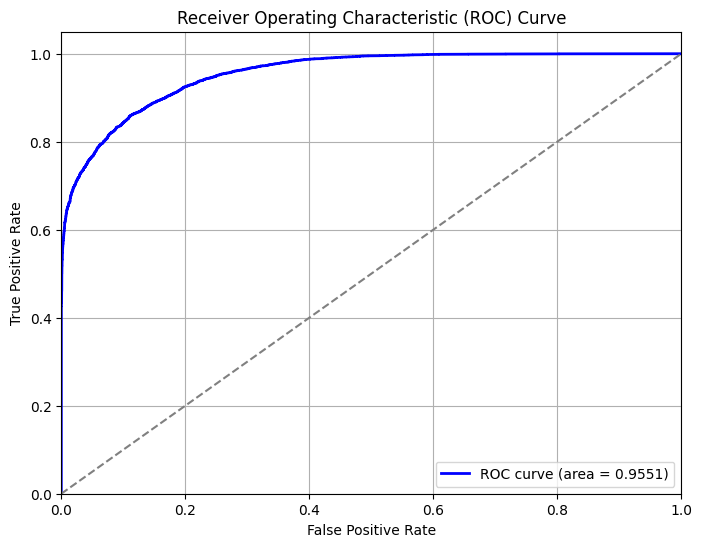

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
# Data for the comparison table
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'PyTorch': [accuracy_pytorch, precision_pytorch, recall_pytorch, f1_pytorch, auc_pytorch],
    'TensorFlow': [tensorf_acc, tensorf_prec, tensorf_rec, tensorf_f1, tensorf_auc]
}

# Create the DataFrame
comparison_table = pd.DataFrame(data)

# Display the table
comparison_table


,Metric,PyTorch,TensorFlow
0,Accuracy,0.866998,0.873161
1,Precision,0.869505,0.879949
2,Recall,0.863488,0.864117
3,F1 Score,0.866486,0.871961
4,AUC,0.945692,0.955061


# Penjelasan Persamaan Matematika

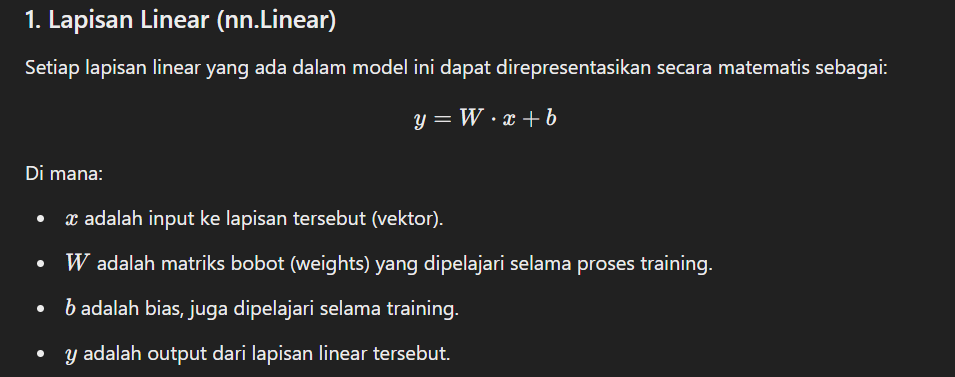

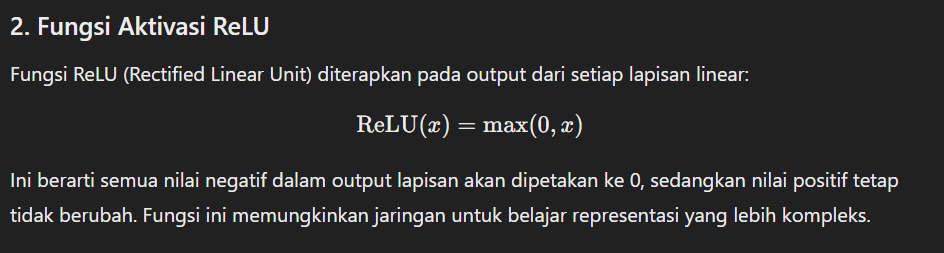

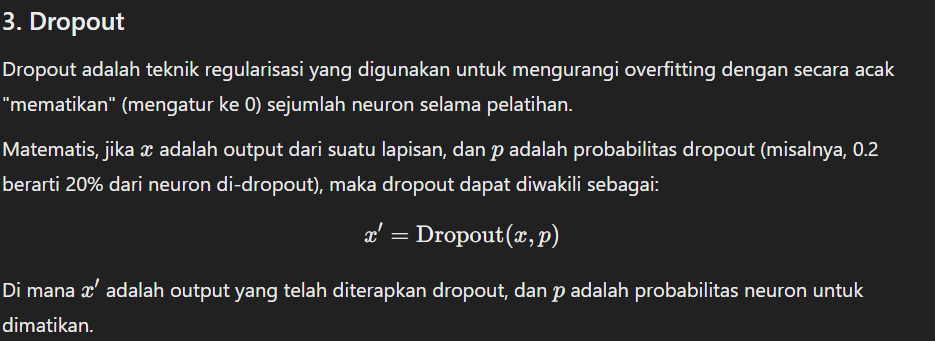

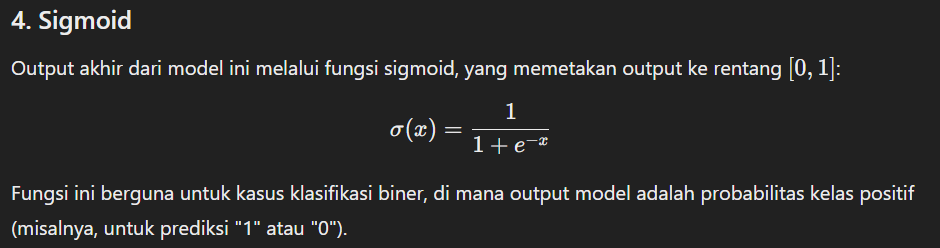

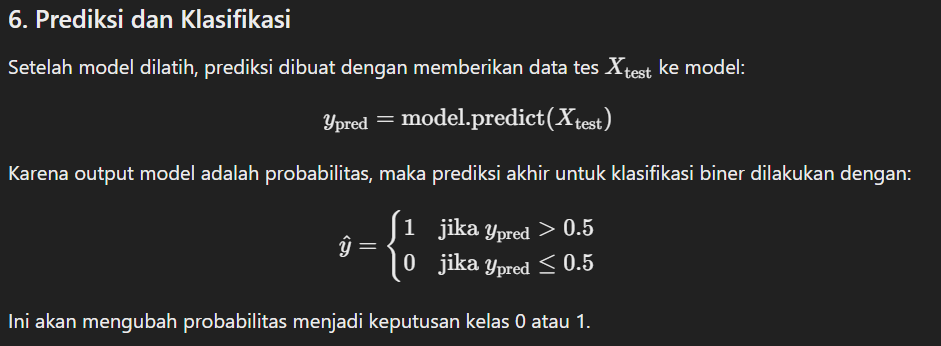